### Classification and Regression Tree (CART)
#### Amaç, veri seti içindeki karmaşık yapıyı basit karar yapılarına dönüştürmektir.
##### Heterojen veri setleriyle belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

#### Model

In [14]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [15]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

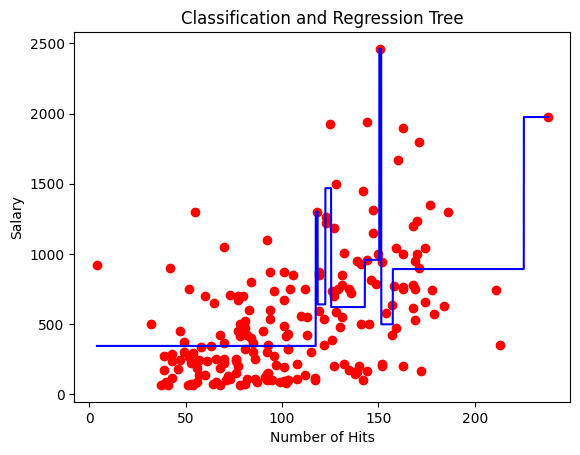

In [16]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color="red")
plt.plot(X_grid, cart_model.predict(X_grid), color="blue")
plt.title("Classification and Regression Tree")
plt.xlabel("Number of Hits")
plt.ylabel("Salary");

#### Predict

In [17]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [18]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

In [ ]:
# All Variables (Data is created again.)
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

In [21]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

438.6547981021758

#### Model Tuning

In [23]:
cart_model = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

427.9463386097717

In [24]:
cart_params = {"max_depth": [2,3,4,5,10,20],
               "min_samples_split": [2,10,5,30,50,10]}

In [25]:
cart_model = DecisionTreeRegressor()

In [26]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv=10).fit(X_train, y_train)

In [27]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

In [28]:
# Final Model
cart_tuned = DecisionTreeRegressor(max_depth=10, min_samples_split=50).fit(X_train, y_train)

In [30]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434